## GARCH MODEL

<ipython-input-14-98909f580e83>:56: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


         Current function value: -11.022173
         Iterations: 1
         Function evaluations: 126
         Gradient evaluations: 19


<ipython-input-14-98909f580e83>:67: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
<ipython-input-14-98909f580e83>:22: RuntimeWarning: invalid value encountered in sqrt
  F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
<ipython-input-14-98909f580e83>:24: RuntimeWarning: invalid value encountered in log
  GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
<ipython-input-14-98909f580e83>:22: RuntimeWarning: invalid value encountered in sqrt
  F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
<ipython-input-14-98909f580e83>:24: RuntimeWarning: invalid value encountered in log
  GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
<ipython-input-14-98909f580e83>:22: RuntimeWarning: invalid value encountered in sqrt
  F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
<ipython-input-14-98909f580e83>:24: RuntimeWarning: invalid value encountered in log
  GAR

         Current function value: nan
         Iterations: 1
         Function evaluations: 672
         Gradient evaluations: 112


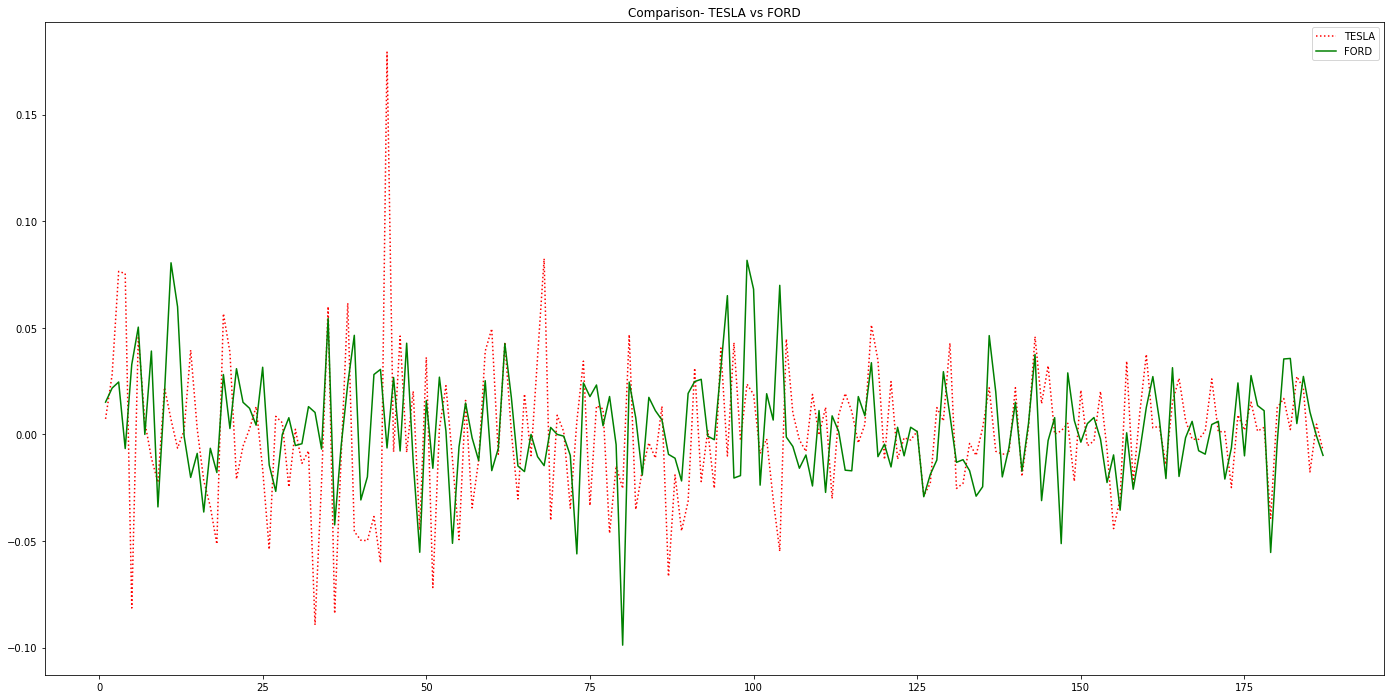

In [14]:
import numpy as np
import pandas as pd
# import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

def GARCH(param, *args):
 "Initialize Params:"
 mu = param[0]
 omega = param[1]
 alpha = param[2]
 beta = param[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.003
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    

# 1. Simulated Data
# T = 1000
# mu = 35;
# sig = 5;
# Y = np.random.normal(mu,sig,T);
# 2. Real Data
TSLA = pdr.get_data_yahoo('TSLA',datetime(2021,1,1), datetime(2021,9,30))
# Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0]

param0 = np.array([0, 0.003, 0.3, 0.3])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)


FORD = pdr.get_data_yahoo('F',datetime(2021,1,1), datetime(2021,9,30))
# Y = TSLA['Adj Close'].values
Y2 = np.diff(np.log(FORD['Adj Close'].values))
T2 = Y2.shape[0]

param0 = np.array([0, 0.003, 0.3, 0.3])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH2 = GARCH_PROD(param_star.x, Y2[0], T2)
timevec2 = np.linspace(1,T2,T2)







plt.figure(figsize=(24,12))
#plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')
#plt.plot(timevec2, Y2,'b',timevec2, Y_GARCH2,'r:')


plt.plot(timevec, Y,'r:')
plt.plot(timevec2, Y2,'g')



#plt.plot(timevec, Y_GARCH,'r')
#plt.plot(timevec2, Y_GARCH2,'g')


plt.title('Comparison- TESLA vs FORD')
plt.legend(['TESLA','FORD']);
plt.savefig('FORD_V_TESLA_GARCH.jpeg')




## GARCH-t MODEL


<ipython-input-33-0323b1e6f4e7>:56: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


         Current function value: -2.163589
         Iterations: 2
         Function evaluations: 152
         Gradient evaluations: 20


<ipython-input-33-0323b1e6f4e7>:65: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


         Current function value: -3.433508
         Iterations: 1
         Function evaluations: 138
         Gradient evaluations: 18


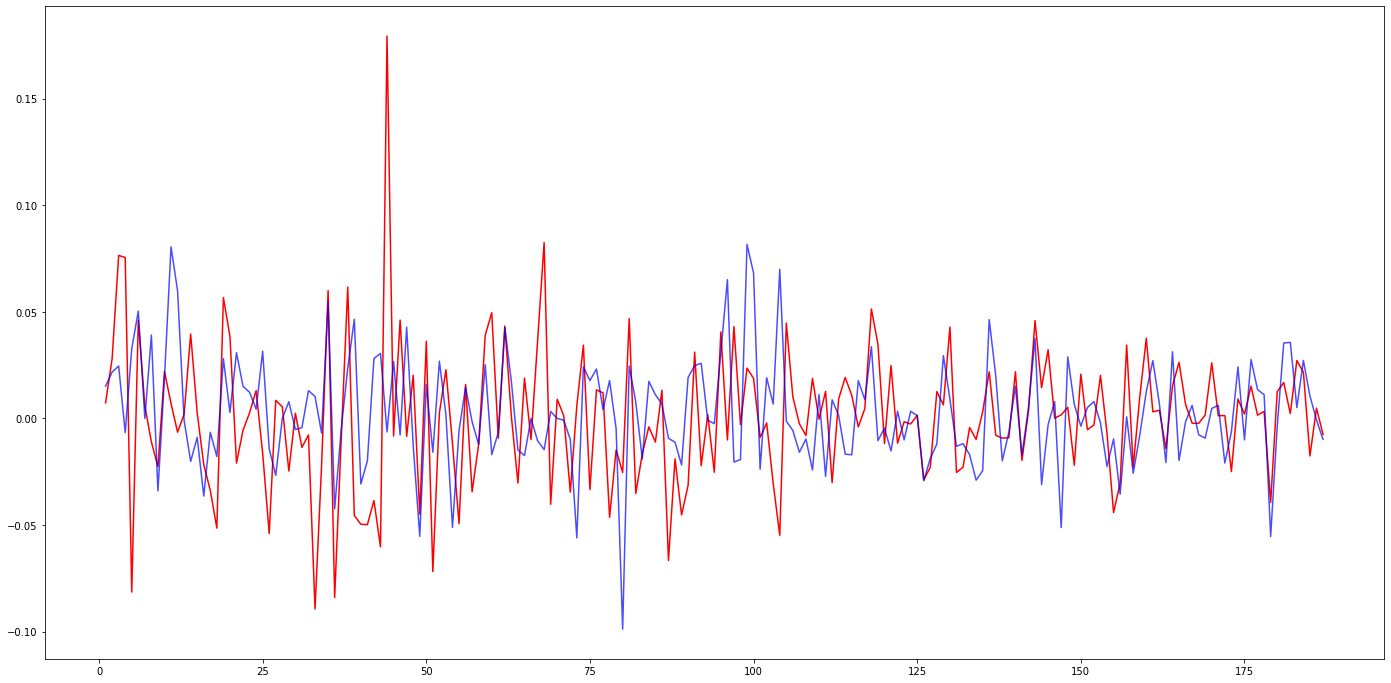

In [33]:
import pandas as pd
import numpy as np
import scipy.special as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def GARCH_t(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 nv = param0[4]
 
 T = Y.shape[0]
 GARCH_t = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.standard_t(nv,1)
    v[t] = sigma2[t]
    GARCH_t[t] = np.log(ss.gamma((nv+1)/2))-np.log(np.sqrt(nv*np.pi))-\
                    np.log(ss.gamma(nv/2))-((nv+1)/2)*np.log(1+((F[t]**2)/v[t])/nv)     
    Likelihood = np.sum(GARCH_t[1:-1])  
    return Likelihood


def GARCH_PROD_t(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 nv = params[4]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.003
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.standard_t(nv,1) 
 return Y    


#T = 1000
#mu = 35;
#sig = 5;
#Y = np.random.normal(mu,sig,T);
TSLA = pdr.get_data_yahoo('TSLA', datetime(2021,1,1), datetime(2021,9,30))
# Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0]
param0 = np.array([0, 0.003, 0.3, 0.3, 30])
param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH_t = GARCH_PROD_t(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)

FORD = pdr.get_data_yahoo('F', datetime(2021,1,1), datetime(2021,9,30))
# Y = TSLA['Adj Close'].values
Y2 = np.diff(np.log(FORD['Adj Close'].values))
T2 = Y2.shape[0]
param0 = np.array([0, 0.003, 0.3, 0.3, 30])
param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH_t2 = GARCH_PROD_t(param_star.x, Y2[0], T2)
timevec2 = np.linspace(1,T2,T2)







plt.figure(figsize=(24,12))
#plt.plot(timevec, Y,'b',timevec, Y_GARCH_t,'r:')
#plt.plot(timevec2, Y2,'b',timevec2, Y_GARCH_t2,'r:')

plt.plot(timevec, Y,'r')
plt.plot(timevec2, Y2,'b',alpha=0.7)


plt.savefig('GARCH_t_model_TESLA_V_FORD.jpeg')




## Based on 0209

In [10]:
import numpy as np
import pandas as pd
import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
yf.pdr_override()

def GARCH(param, *args):
 "Initialize Params:"
 mu = param[0]
 omega = param[1]
 alpha = param[2]
 beta = param[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    

TSLA = pdr.get_data_yahoo('TSLA', datetime(2021,1,1), datetime(2021,8,31))
# Y = np.diff(np.log(TSLA['Adj Close'].values))
Y = TSLA['Adj Close'].values 
T = Y.shape[0];
param0 = np.array([np.mean(Y), np.std(Y)/2, 0.5, 0.5])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.figure(figsize=(15,10))
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r')

ModuleNotFoundError: No module named 'pyflux'

## Kalman Filter: Preliminary (Toy Model)


[*********************100%***********************]  1 of 1 completed
         Current function value: -0.494207
         Iterations: 2
         Function evaluations: 432
         Gradient evaluations: 71


<ipython-input-22-c319428dbbd1>:89: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


[*********************100%***********************]  1 of 1 completed
         Current function value: -0.628814
         Iterations: 2
         Function evaluations: 455
         Gradient evaluations: 75


<ipython-input-22-c319428dbbd1>:98: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


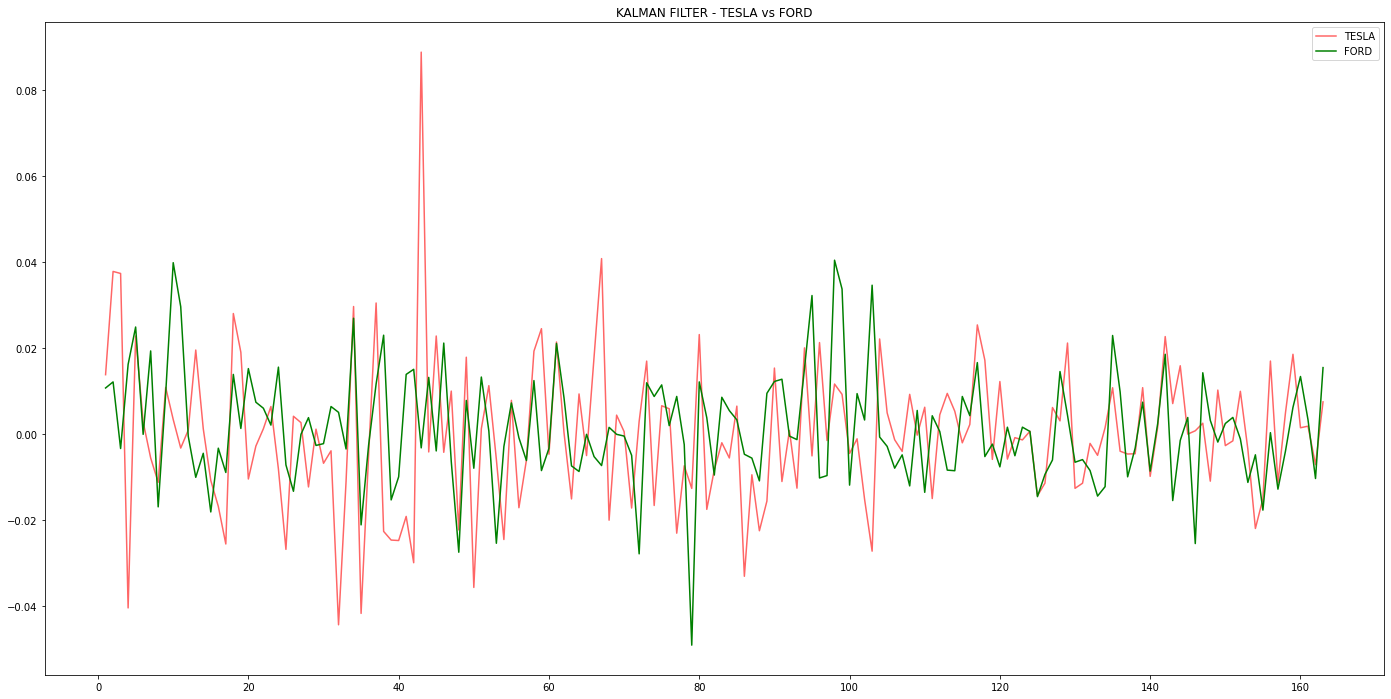

In [22]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
 
def Kalman_Filter(param, *args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = param[0]
 T = param[1]
 H = param[2]
 Q = param[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 KF_Dens = np.zeros(S)
 for s in range(1,S):
  if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
  else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]      
    
    Likelihood = sum(KF_Dens[1:-1]) # a loss function
    
    return Likelihood
          
def Kalman_Smoother(params, Y, *args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = params[0]
 T = params[1]
 H = params[2]
 Q = params[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 for s in range(1,S):
   if s == 1: 
    P_update[s] = 100
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
   else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]    
 for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
 u_smooth = u_smooth[1:-1]
 return u_smooth

#Z:coeff attached to latent component
#Z=1 
#Optimize T value in future --> Autoregressive  component 

start_date = datetime(2021,1,1)
end_date = datetime(2021,8,30)
TSLA = yf.download('TSLA',start_date ,end_date)
Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.size;

param0 = np.array([0.9, 0.2, np.std(Y), np.std(Y)])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x,Y)
timevec = np.linspace(1,T-1,T-1)

FORD = yf.download('F',start_date ,end_date)
Y2 = FORD['Adj Close'].values
Y2 = np.diff(np.log(FORD['Adj Close'].values))
T2 = Y2.size;
param0 = np.array([0.9, 0.2, np.std(Y2), np.std(Y2)])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u2 = Kalman_Smoother(param_star.x,Y2)
timevec2 = np.linspace(1,T2-1,T2-1)


plt.figure(figsize=(24,12))
#plt.plot(timevec, u,'r',timevec, Y[0:-1],'r:')
#plt.plot(timevec, u2,'g',timevec, Y2[0:-1],'g:')
plt.plot(timevec, u,'r',alpha=0.6);
plt.plot(timevec2, u2,'g');
plt.title('KALMAN FILTER - TESLA vs FORD')
plt.legend(['TESLA','FORD']);
plt.savefig('Tesla_vs_Ford_KALMAN.jpeg')



In [12]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

In [5]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=2630ff78a8cf6866c201a41da8b6b4f55f63c2899559abb3e41fea83e84600cf
  Stored in directory: /home/kanishka/.cache/pip/wheels/f9/e9/7e/8b13db3bf3aeb5049d759e10702736fb96753089ac950fddc0
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8375 sha256=46d8ee78fc25a3cd17f1991491c8c6d9fdacd8f9d708c42ab324027fd4cb3320
  Stored in directory: /home/kanishka/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
!pip install pyflux

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 189 kB 27.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-yl6xrk84/pyflux_ca0a8619f0584122a0bc7aeecce5fde2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-yl6xrk84/pyflux_ca0a8619f0584122a0bc7aeecce5fde2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ukyy6ra7
       cwd: /tmp/pip-install-yl6xrk84/pyflux_ca0a8619f0584122a0bc7aeecce5fde2/
  Complete output (

  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=f1b5e25cb71e624ce077a6bb373202e2e5efdce88fc887f92b6996da1f7fd64d
  Stored in directory: /home/kanishka/.cache/pip/wheels/0d/18/4f/be14421713ec96521183a9f4dc86becb3e6c1bf1b5578a4e57
Successfully built algopy
Failed to build pyflux
    Running setup.py install for pyflux ... error
    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-yl6xrk84/pyflux_ca0a8619f0584122a0bc7aeecce5fde2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-yl6xrk84/pyflux_ca0a8619f0584122a0bc7aeecce5fde2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-jjelatmi/install-

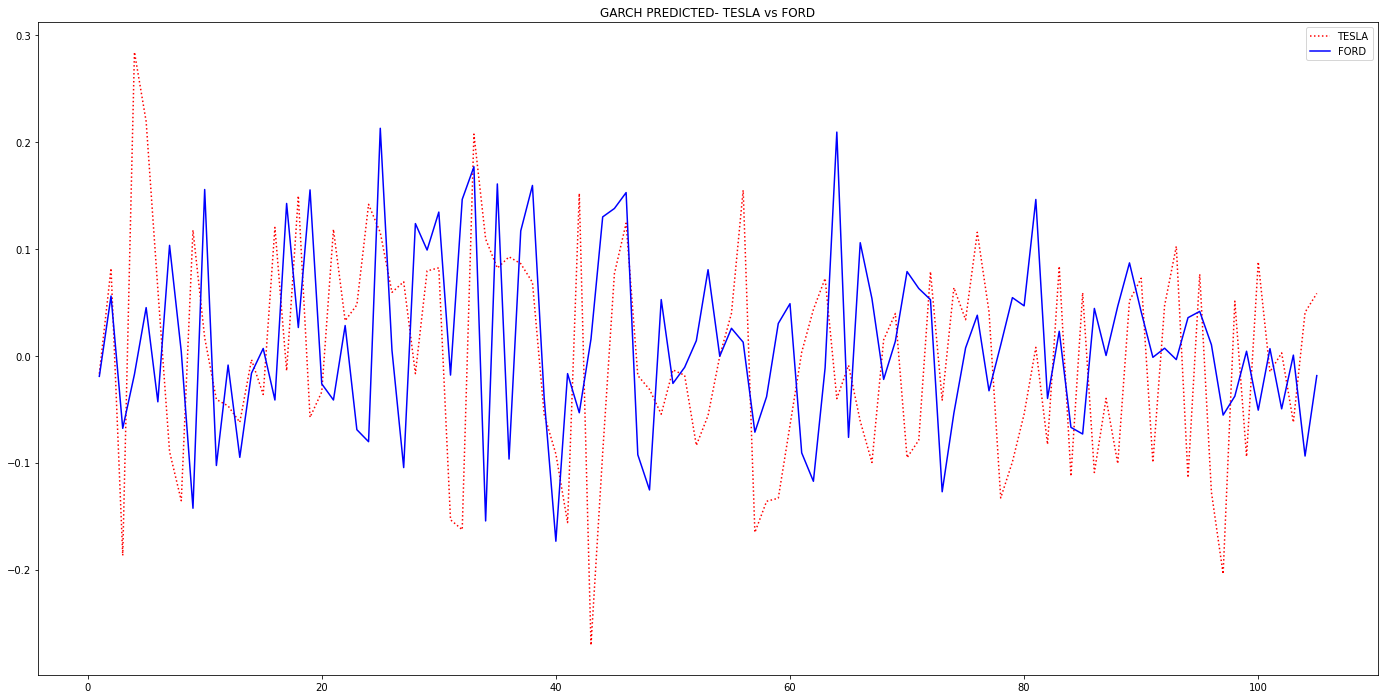

In [11]:





plt.figure(figsize=(24,12))
#plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')
#plt.plot(timevec2, Y2,'b',timevec2, Y_GARCH2,'r:')


plt.plot(timevec, Y_GARCH,'r:')
plt.plot(timevec2, Y_GARCH2,'b')


plt.title('GARCH PREDICTED- TESLA vs FORD')
plt.legend(['TESLA','FORD']);
plt.savefig('FORD_V_TESLA_GARCH.jpeg')

